In [1]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from convenience_functions import show_image

from astropy.stats import mad_std

In [2]:
obj_path=Path('wc')
obj_files=ccdp.ImageFileCollection(obj_path)

In [3]:
obj_list=[]
for ccd in obj_files.ccds(masked=True,**{'data-typ':'object'}):
    obj_list.append(ccd)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 31

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTy

In [4]:
bkg=np.ones_like(obj_list[0])
bkg[:,:10]=0
bkg[:,60:]=0
bkg[:,30:50]=0
bkg=bkg.astype("bool")

In [5]:
result=[]
for im in obj_list:
    im_bkg=np.median(im[bkg],axis=1)
    result=im-im_bkg
    result.append()

AxisError: axis 1 is out of bounds for array of dimension 1

In [6]:
im1=obj_list[0]

In [7]:
bkg_col=list(np.arange(10,30))+list(np.arange(30,50))
im1_bkg=im1[:,bkg_col]

In [8]:
result1=im1-np.median(im1_bkg,axis=1).reshape((4191,1))

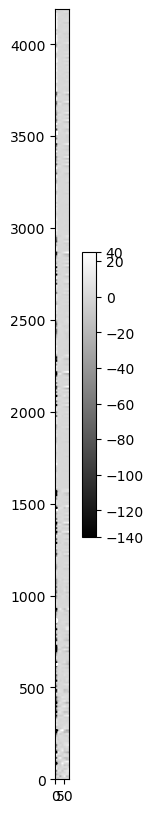

In [44]:
from astropy import units as u
fig, ax=plt.subplots(1,1,figsize=(4,10))
show_image(result1,cmap='gray',fig=fig,ax=ax)
result1=CCDData(result1,unit=u.electron)
result1.meta=im1.meta
result1.write('try1try.fits')

Ono result

In [2]:
ono_path=Path('ono')
ono_file=ccdp.ImageFileCollection(ono_path)

In [4]:
ono_re=CCDData.read('ono/z161207.fits')

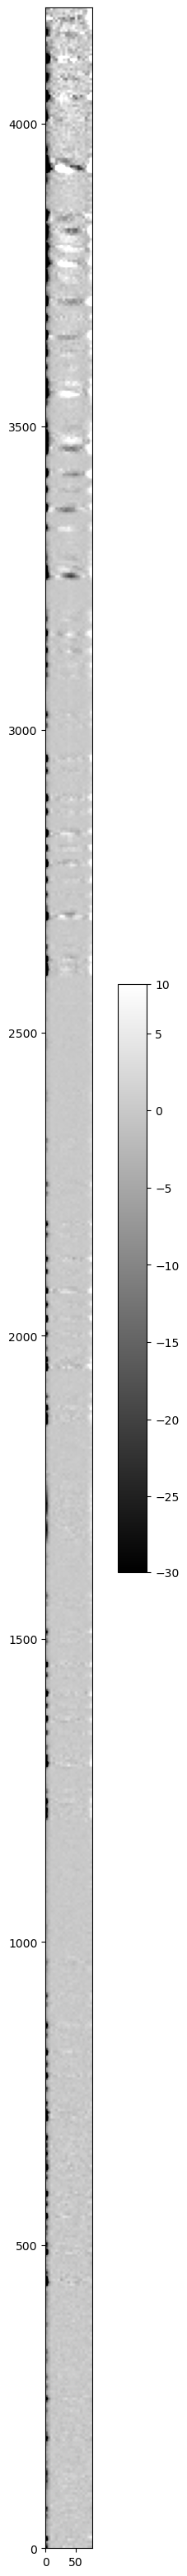

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,40))
show_image(ono_re,cmap='gray',fig=fig, ax=ax)

In [8]:
ono_1=CCDData.read('ono/obj1.fits')
ono_cr=CCDData.read('ono/obj1_cr.fits')
ono_crwc=CCDData.read("ono/obj1_cr_wc.fits")
ono_bkg=CCDData.read("ono/obj1_cr_wc_bkg.fits")


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.


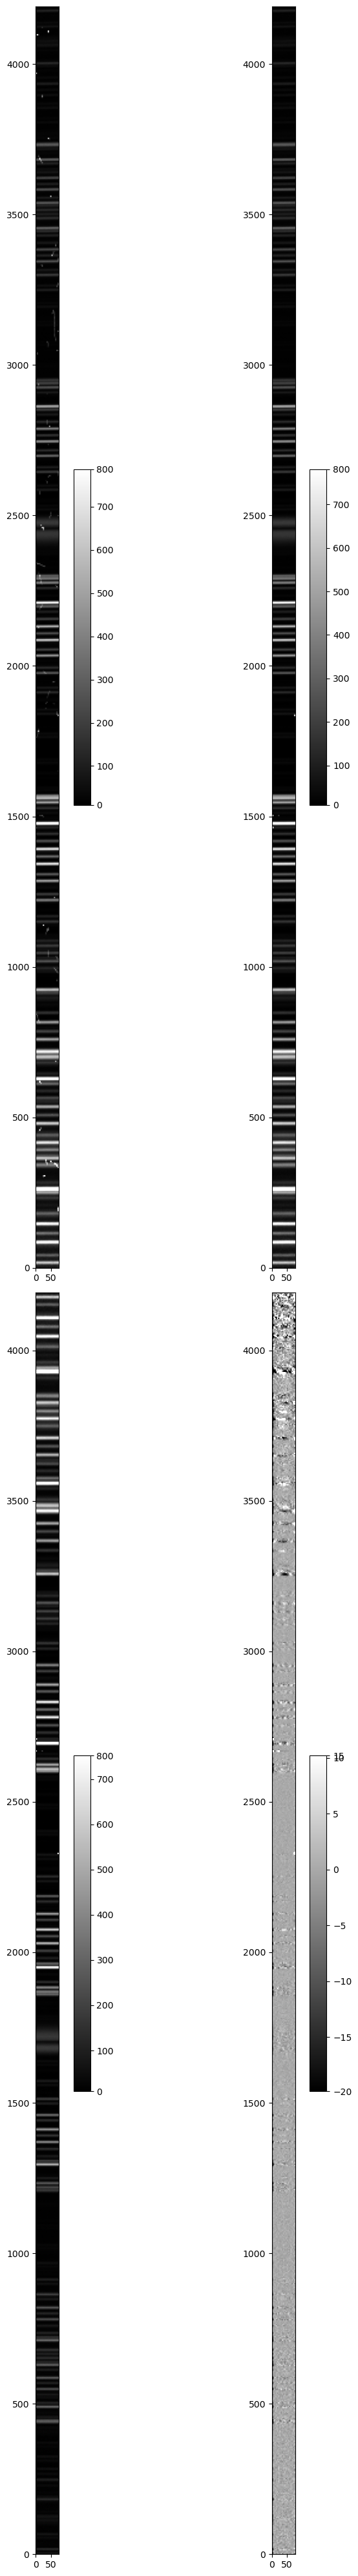

In [10]:
fig, axes = plt.subplots(2,2,figsize=(10,40),tight_layout=True)
show_image(ono_1,cmap='gray',fig=fig, ax=axes[0,0])
show_image(ono_cr,cmap='gray',fig=fig, ax=axes[0,1])
show_image(ono_crwc,cmap='gray',fig=fig, ax=axes[1,0])
show_image(ono_bkg,cmap='gray',fig=fig, ax=axes[1,1])


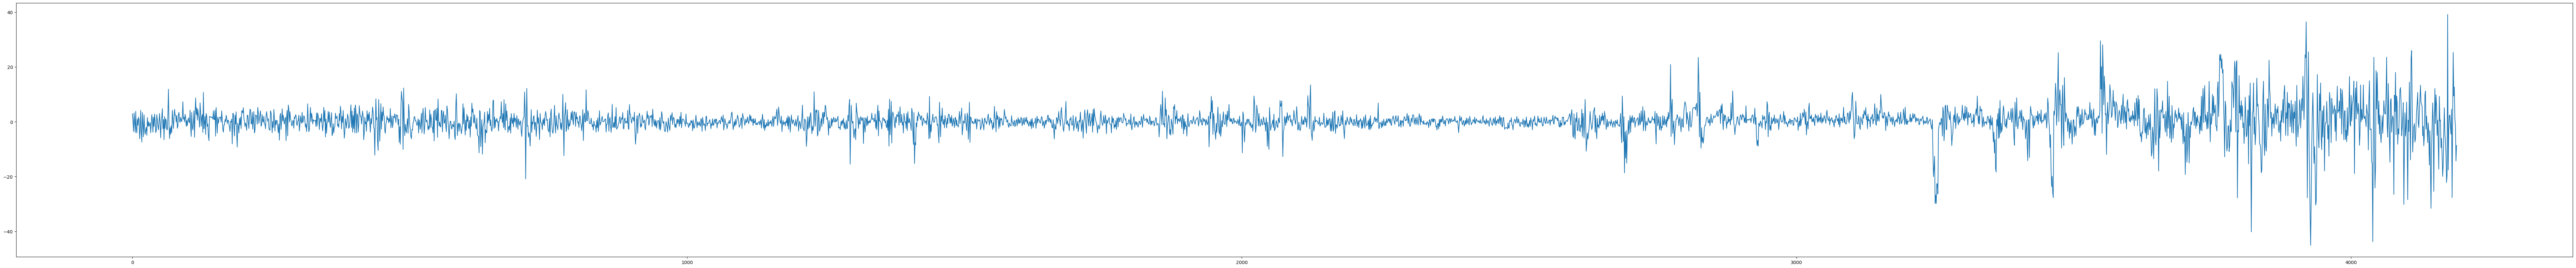

In [23]:
plt.figure(figsize=(100,10))
plt.plot(ono_re.data[:,40])

In [24]:
ono_cr

CCDData([[ 27.938969 ,  76.42631  , 108.11915  , ..., 127.869484 ,
          226.5028   , 259.38562  ],
         [ 96.99568  , 106.85387  ,  98.37056  , ..., 143.53102  ,
          164.86528  , 230.60727  ],
         [ 90.45757  ,  48.32766  ,  96.83238  , ...,  91.789345 ,
          109.23418  , 206.8124   ],
         ...,
         [ 20.146873 ,  53.081093 ,  81.84659  , ...,  62.383583 ,
           51.890835 ,  63.328083 ],
         [ 10.774845 ,  40.481026 ,  63.400135 , ...,  58.402847 ,
           46.97776  ,  77.2053   ],
         [  3.6229057,  40.54668  ,  38.502945 , ...,  67.63749  ,
           54.422035 ,  73.36496  ]], unit='adu')

In [9]:
arc1=CCDData.read("wc/FCSA00209469.fits")

Set DATE-END to '2019-05-12T14:44:22.309' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:44:22.309' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


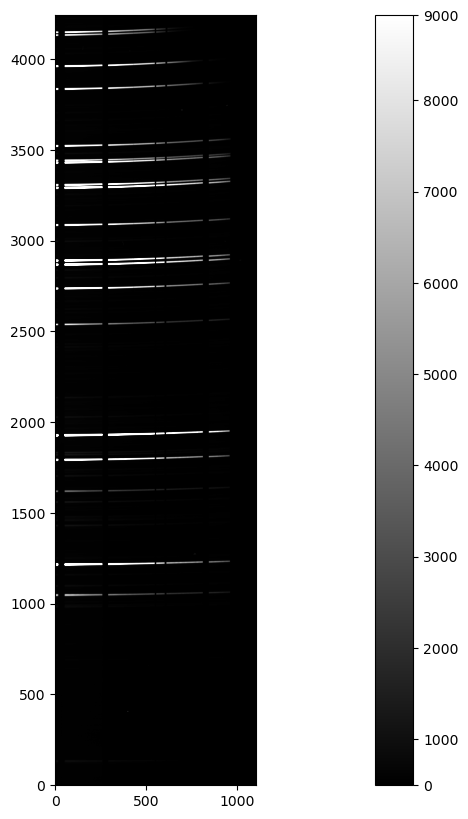

In [15]:
show_image(arc1,cmap='gray')

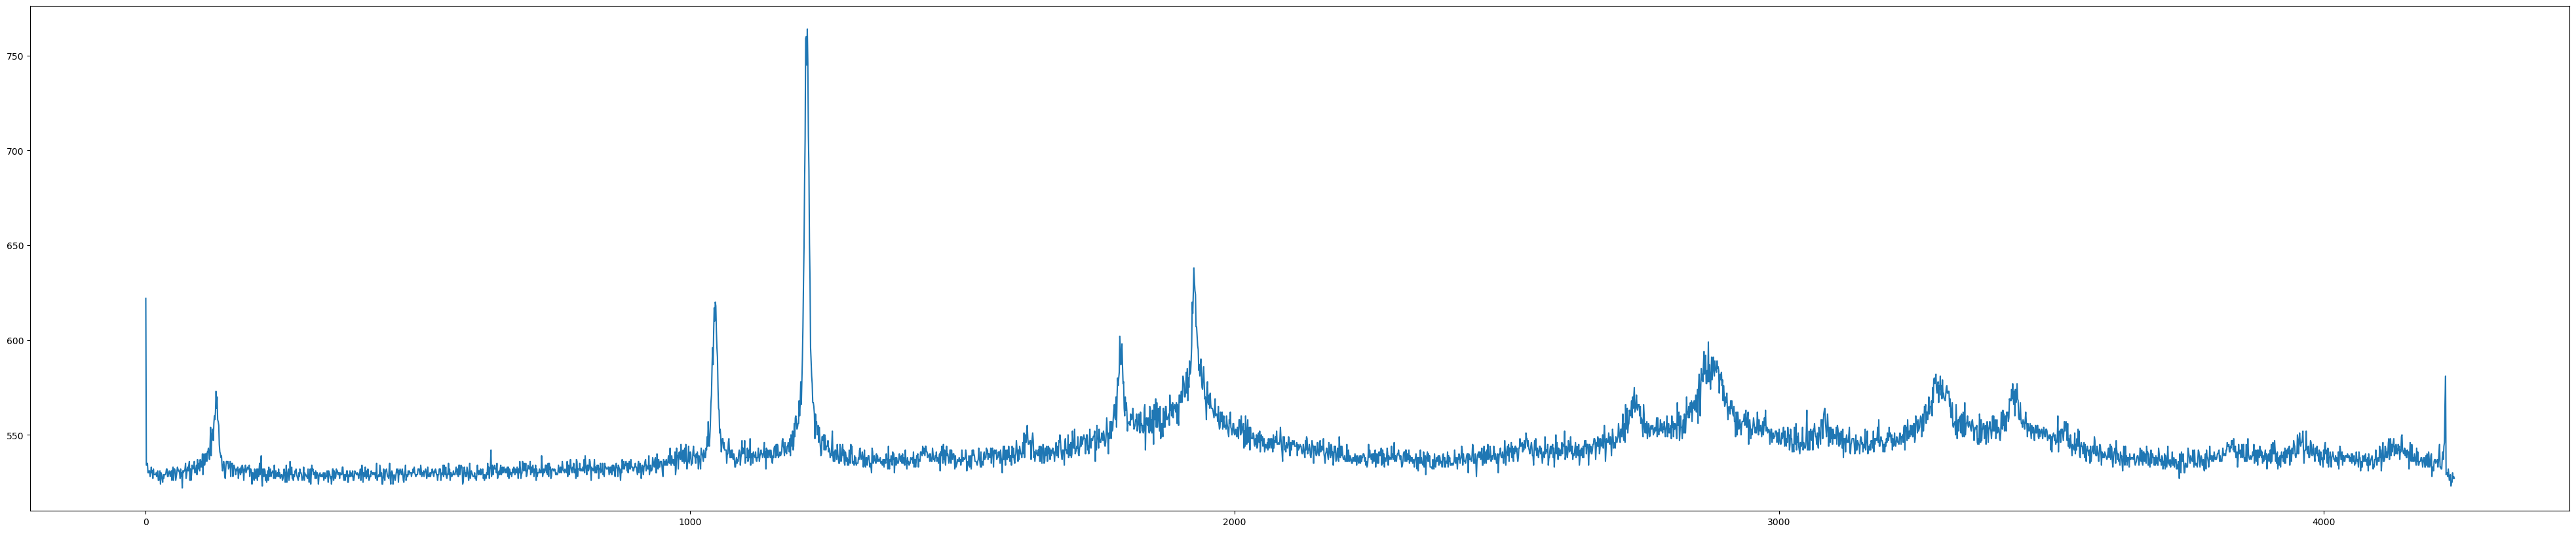

In [29]:
plt.figure(figsize=(50,10))
plt.plot(arc1.data[:,50])

In [31]:
obj_files.summary

file,simple,bitpix,naxis,naxis1,naxis2,adc,adc-str,adc-end,adc-type,airmass,airm-str,airm-end,altitude,alt-str,alt-end,azimuth,az-str,az-end,dataset,dec,sltc-dec,dom-hum,dom-hstr,dom-hend,dom-prs,dom-pstr,dom-pend,dom-tmp,dom-tstr,dom-tend,dom-wnd,dom-wstr,dom-wend,equinox,efp-min1,efp-min2,efp-rng1,efp-rng2,exp-id,foc-pos,foc-val,gain,insrot,inr-str,inr-end,inst-pa,instrume,m2-tip,m2-type,object,obs-aloc,observer,obs-mod,out-hum,out-hstr,out-hend,out-prs,out-pstr,out-pend,out-tmp,out-tstr,out-tend,out-wnd,out-wstr,out-wend,prop-id,ra,sltc-ra,secz,secz-str,secz-end,seeing,telescop,telfocus,transp,tran-str,tran-end,ut1-utc,weather,zd,zd-str,zd-end,bin-fct1,bin-fct2,blank,bunit,observat,data-typ,date-obs,dec2000,detector,det-id,detpxsz1,detpxsz2,det-tmp,dispaxis,dispersr,exptime,filter01,filter02,filter03,frameid,hst,hst-str,hst-end,lst,lst-str,lst-end,mjd,mjd-str,mjd-end,prd-min1,prd-min2,prd-rng1,prd-rng2,ra2000,slit,sltcpix1,sltcpix2,slt-len,slt-pa,slt-wid,timesys,ut,ut-str,ut-end,wavelen,wav-max,wav-min,crval1,crval2,crpix1,crpix2,cdelt1,cdelt2,pc001001,pc001002,pc002001,pc002002,longpole,ctype1,ctype2,cunit1,cunit2,cd1_1,cd1_2,cd2_1,cd2_2,f_fcsmod,f_wipe,f_read,c2val1,c2val2,c2pix1,c2pix2,c2elt1,c2elt2,p2001001,p2001002,p2002001,p2002002,c2ype1,c2ype2,c2nit1,c2nit2,wcs-orig,radecsys,subtract_overscan,suboscan,trim_image,trimim,subtract_bias,subbias,flat_correct,flatcor,masked,extend,bscale,bzero
str17,bool,int64,int64,int64,int64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str12,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,str12,str10,float64,float64,float64,float64,float64,float64,str5,str3,str6,str10,str11,str13,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,str12,str12,float64,float64,float64,float64,str6,str6,float64,float64,float64,float64,str4,float64,float64,float64,int64,int64,int64,str8,str4,str10,str10,str12,str3,int64,float64,float64,float64,int64,str10,float64,str4,str10,str4,str12,str12,str12,str12,str12,str12,str12,float64,float64,float64,int64,int64,int64,int64,str12,str10,float64,float64,float64,float64,float64,str3,str12,str12,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str10,str6,str2,float64,float64,float64,float64,str8,str6,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str8,str6,str6,str14,str3,object,object,object,object,object,object,object,object,object,object,object,object
CR_obj1.fits,True,-32,2,77,4191,24.37,24.37,25.75,IN,1.277,1.277,1.304,51.4766,51.4766,50.0206,343.95901,343.95901,340.16299,DS000,+55:59:27.94,+55:59:27.94,26.7,26.7,28.1,622.0,622.0,621.9,278.15,278.15,278.05,0.2,0.2,0.2,2000.0,30,1,1066,4241,FCSE00209435,Cassegrain,-0.16,1.997,-117.0,-117.0,-124.1,90.6,FOCAS,OFF,CS_OPT,z161207,Observation,Ono and Sakai,SPEC_MOS,27.0,27.0,29.8,622.0,622.0,621.9,277.85,277.85,277.75,2.6,2.6,1.8,o19101,16:12:05.745,16:12:05.745,1.278,1.278,1.305,0.23,Subaru,CS_OPT,1.0,1.0,1.0,-0.15717,Fine,38.5235,38.5235,39.9794,2,1,-32768,electron,NAOJ,OBJECT,2019-05-12,+55:59:27.94,HPK,1,0.015,0.015,-99.900002,2,SCFCGRHD90,1200.0,NONE,SCFCFLSO58,NONE,FCSA00209435,02:26:06.877,02:26:06.877,02:46:07.333,17:24:09.314,17:24:09.314,17:44:13.057,58615.51813333,58615.51813333,58615.5320275,59,1,2208,4241,16:12:05.745,SCFCMS1344,0.0,0.0,300.0,-90.6,0.5,UTC,12:26:06.877,12:26:06.877,12:46:07.333,750.0,655.0,655.0,243.02394104,55.99109268,-34.0,2041.0,0.1038,0.1038,1.0,0.0,0.0,1.0,180.0,RA---TAN,WAVELENGTH,degree,nm,0.2076,0.0,0.0,0.1038,SPEC_MOS,NORMAL,NORMAL,243.0239375,55.99109444,-34.0,2041.0,5.767e-05,2.883e-05,0.99994277,-0.01069866,0.01069866,0.99994277,RA---TAN,DEC--TAN,degree,degree,SUBARU Toolkit,FK5,suboscan,"ccd=<CCDData>, overscan=<CCDData>, median=True",trimim,ccd=<CCDData>,subbias

In [32]:
skys=CCDData.read("ono/sky.fits")

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.


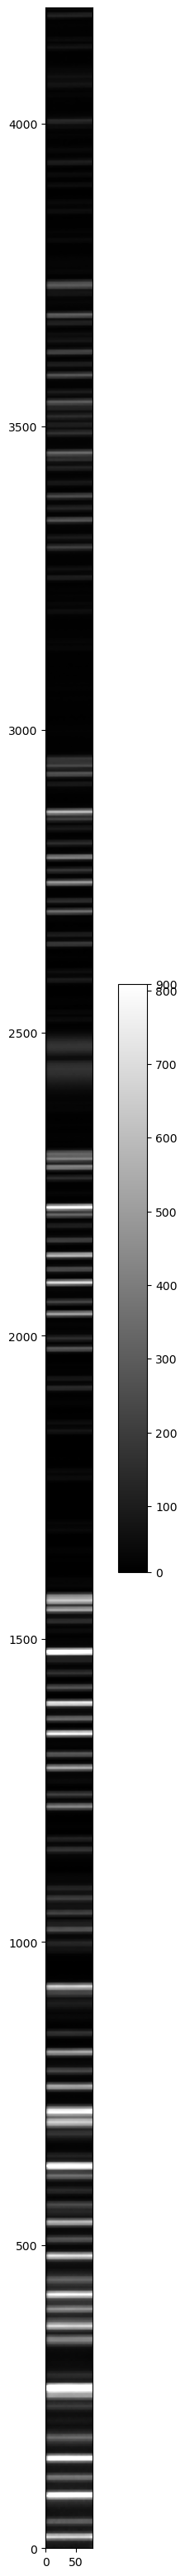

In [33]:
fig, ax = plt.subplots(1,1,figsize=(10,40))
show_image(skys,cmap='gray',fig=fig, ax=ax)

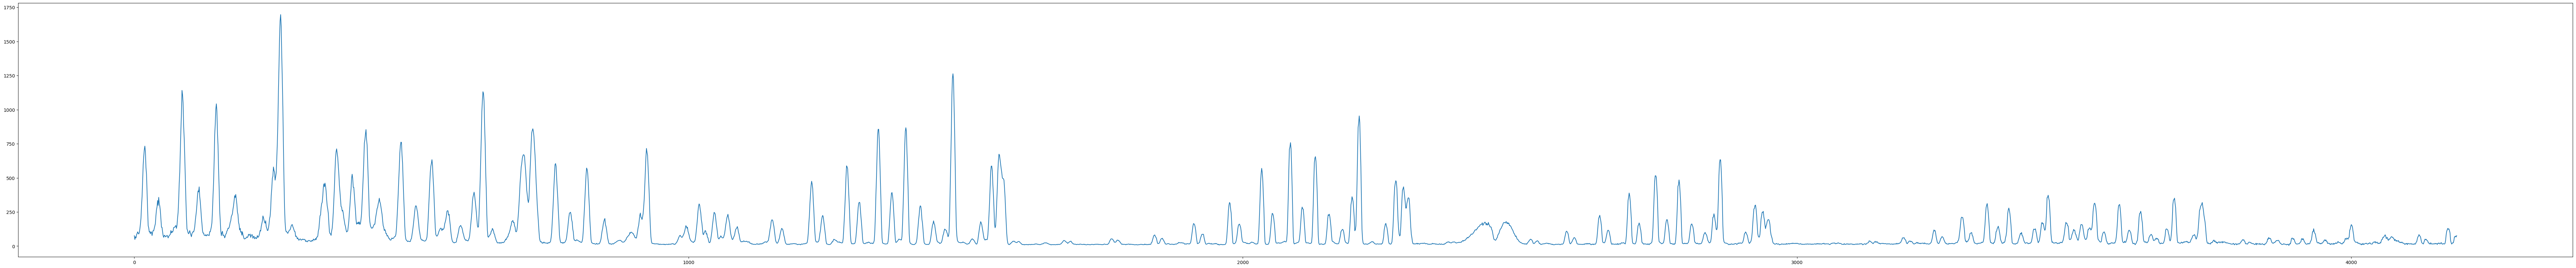

In [36]:
plt.figure(figsize=(100,10))
plt.plot(skys.data[:,40])